In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
n_rows = 4
n_cols = 4
n_states = n_rows * n_cols
n_actions = 4
transitions = np.zeros((n_states,n_actions, n_states))
rewards = np.zeros((n_states,n_actions, n_states))
gamma = 0.9

for row in range(n_rows):
    for col in range(n_cols):
        s = row*n_cols+col # State 0 to 15 (16 states)
        # print(s)
        for a in range(n_actions):
            if a ==0: #move up
                s1 = max(row-1, 0 ) * n_cols + col
            elif a ==1: #move down
                s1 = min(row+1, n_rows-1) * n_cols + col
            elif a == 2: #move left
                s1 = row * n_cols + max(col-1, 0 )
            else:
                s1 = row * n_cols + min(col+1, n_cols-1)
            transitions[s,a,s1] = 1.0
            rewards[s,a,s1] = -1.0 if s1 != n_states-1 else 0.0

In [23]:
transitions

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]])

In [24]:
rewards

array([[[-1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [-1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., -1.,  0., ...,  0.,  0.,  0.]],

       [[ 0., -1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [-1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., -1., ...,  0.,  0.,  0.]],

       [[ 0.,  0., -1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., -1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., -1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., -1.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., -1.,  0.],
        [ 0.,  0.,  0., ..., -1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.

In [27]:
def value_iteration(transitions, rewards, gamma, n_states, n_actions):
    v = np.zeros(n_states)
    v_history = [v.copy()]
    delta = 1

    #value iter loop:
    while delta > 1e-6:
        delta = 0
        for s in range(n_states):
            v_old = v[s]
            q = np.zeros(n_actions)
            for a in range(n_actions):
                q[a] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states))
            v[s] = np.max(q)
            delta = max(delta, abs(v_old-v[s]))
        v_history.append(v.copy())


    #derive policy
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        q = np.zeros(n_actions)
        for a in range(n_actions):
            q[a] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states))
        policy[s] = np.argmax(q)
    return policy, v, v_history

In [28]:
policy, v, v_history = value_iteration(transitions, rewards, gamma, n_states, n_actions)

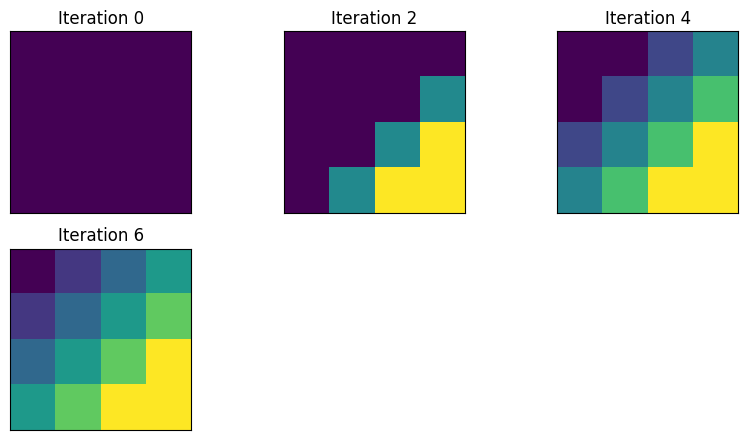

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

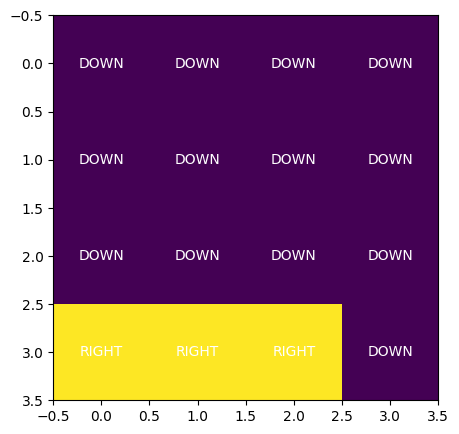

In [29]:
plt.figure(figsize=(10, 8))
for i in range(0, len(v_history), 2):
    plt.subplot(3,3, int(i/2+1))
    plt.imshow(v_history[i].reshape(n_rows, n_cols))
    plt.title('Iteration {}'.format(i))
    plt.xticks([])
    plt.yticks([])
plt.show() # Dark squares means higher optimal values

actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
plt.figure(figsize=(6,5))
plt.imshow(policy.reshape(n_rows, n_cols))
for row in range(n_rows):
    for col in range(n_cols):
        plt.text(col, row, actions[policy[row*n_cols + col]],
                color='white', ha='center', va='center')
plt